In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
train_data=pd.read_csv('Train.csv')
train_data.shape
#train_data.head()

(42000, 785)

In [30]:
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]
X.shape
#y.shape

(42000, 784)

In [31]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


In [32]:
#One-hot encoding
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,175 (63.18 KB)

 Trainable params: 16,175 (63.18 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
## Early stopping keras
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [38]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),callbacks=early_stopping)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9270 - loss: 0.2575 - val_accuracy: 0.9348 - val_loss: 0.2380
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9436 - loss: 0.1971 - val_accuracy: 0.9377 - val_loss: 0.2268
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9487 - loss: 0.1724 - val_accuracy: 0.9398 - val_loss: 0.2070
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9522 - loss: 0.1606 - val_accuracy: 0.9476 - val_loss: 0.1869
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9582 - loss: 0.1404 - val_accuracy: 0.9464 - val_loss: 0.1800


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9465 - loss: 0.1811
Validation Accuracy: 94.64%


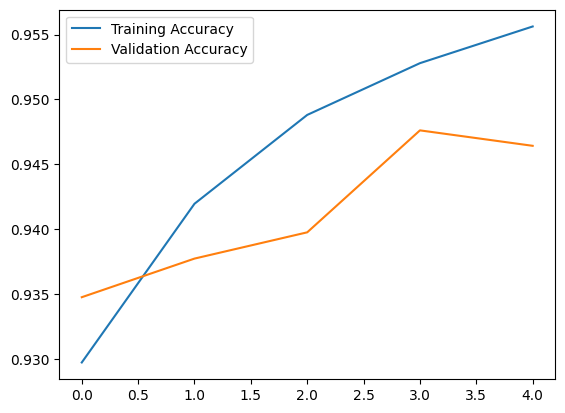

In [39]:
## EVALUATION
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.9106471575050396


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


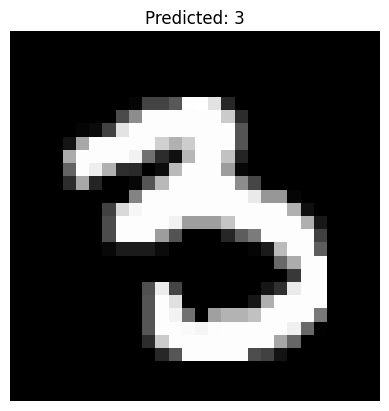

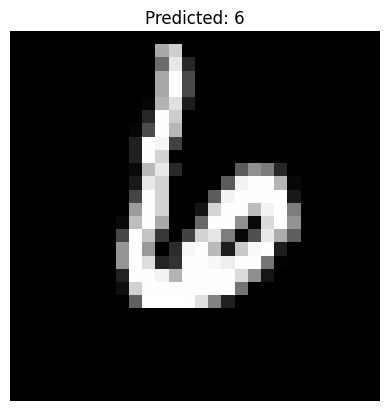

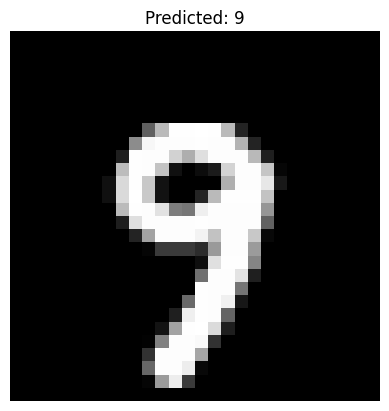

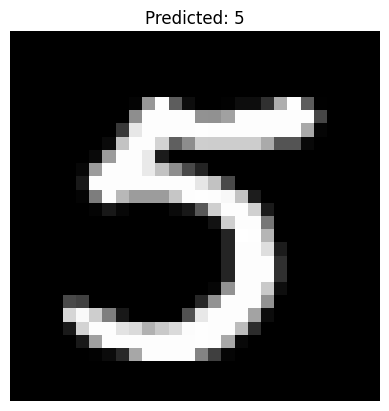

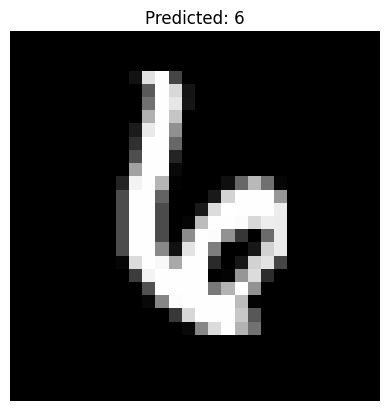

In [45]:
## Make Predictions ##
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()